<a href="https://colab.research.google.com/github/Raybarreto/Analise_EnergiaSolar_BR/blob/main/Energia_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extra√ß√£o dos dados

In [105]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Raybarreto/Analise_EnergiaSolar_BR/refs/heads/main/dados_instalacoes_solares%20_2000.csv'
df = pd.read_csv(url)
df.head()

ID Cliente      Nome do Cliente Data da Instala√ß√£o Tipo de Instala√ß√£o  \
0     CLI001            Zoe Souza         2023-07-04        Residencial   
1     CLI002  Luiz Gustavo Barros         2024-12-19          Comercial   
2     CLI003  Maria Isis Nogueira         2023-09-17              Rural   
3     CLI004      Isabella Foga√ßa         2024-05-29              Rural   
4     CLI005         Renan da Luz         2024-12-08        Residencial   

            Endere√ßo (Rua)             Bairro           Cidade Estado  \
0        Pra√ßa Campos, 358        Xodo-Marize           Vieira     SP   
1  Esta√ß√£o de Pastor, 1770  Solar Do Barreiro           Vargas     AL   
2         Rua da Rosa, 301            Bacurau            Sales     PB   
3       Via de Novaes, 961  Nova Cachoeirinha          da Cruz     ES   
4    Campo de Cirino, 1365          Gameleira  Novais da Prata     SC   

         CEP  Valor do Servi√ßo (R$)       Tipo de Pagamento  N¬∫ Parcelas  \
0   91049709               48370.73                  Boleto            0   
1  03212-977               52868.64  Financiamento Banc√°rio           72   
2  41605-868               59582.56       Cart√£o de Cr√©dito           12   
3   98996606               22538.89                 √Ä Vista            0   
4  43648-866               77419.02  Financiamento Banc√°rio           48   

  Institui√ß√£o Financeira Origem do Cliente  Avalia√ß√£o (1-5)  \
0                    NaN             Outro                4   
1                   Ita√∫            Google                2   
2             Mastercard          Panfleto                2   
3                    NaN         Indica√ß√£o                1   
4        Banco do Brasil          Panfleto                2   

                               Coment√°rio do Cliente  Sistema (kWp)  \
0  Optio adipisci consectetur reiciendis perspici...            4.0   
1                        Illo voluptates vero nihil.            3.3   
2  Occaecati ducimus incidunt a animi alias adipi...            5.8   
3                                                NaN           12.6   
4                                                NaN            2.0   

   N¬∫ de Placas Indica√ß√£o de Quem? Vendedor Respons√°vel  
0            12                NaN         Diana Santos  
1            11                NaN          Bruno Silva  
2            16                NaN        Fernanda Lima  
3            32      Luna Silveira          Bruno Silva  
4             5                NaN            Ana Clara

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Cliente              2000 non-null   object 
 1   Nome do Cliente         2000 non-null   object 
 2   Data da Instala√ß√£o      2000 non-null   object 
 3   Tipo de Instala√ß√£o      2000 non-null   object 
 4   Endere√ßo (Rua)          2000 non-null   object 
 5   Bairro                  2000 non-null   object 
 6   Cidade                  2000 non-null   object 
 7   Estado                  2000 non-null   object 
 8   CEP                     2000 non-null   object 
 9   Valor do Servi√ßo (R$)   2000 non-null   float64
 10  Tipo de Pagamento       2000 non-null   object 
 11  N¬∫ Parcelas             2000 non-null   int64  
 12  Institui√ß√£o Financeira  983 non-null    object 
 13  Origem do Cliente       2000 non-null   object 
 14  Avalia√ß√£o (1-5)         2000 

# Verificando Inconsist√™ncias nos Dados

**1. Verificar valores ausentes**

In [107]:
print("Valores Ausentes por Coluna:")
print(df.isnull().sum())

Valores Ausentes por Coluna:
ID Cliente                   0
Nome do Cliente              0
Data da Instala√ß√£o           0
Tipo de Instala√ß√£o           0
Endere√ßo (Rua)               0
Bairro                       0
Cidade                       0
Estado                       0
CEP                          0
Valor do Servi√ßo (R$)        0
Tipo de Pagamento            0
N¬∫ Parcelas                  0
Institui√ß√£o Financeira    1017
Origem do Cliente            0
Avalia√ß√£o (1-5)              0
Coment√°rio do Cliente      602
Sistema (kWp)                0
N¬∫ de Placas                 0
Indica√ß√£o de Quem?        1747
Vendedor Respons√°vel         0
dtype: int64


**2. Verificar linhas duplicadas**


In [108]:
print(f"N√∫mero de Linhas Duplicadas: {df.duplicated().sum()}\n")

N√∫mero de Linhas Duplicadas: 0



**3. Verificar valores √∫nicos para colunas categ√≥ricas para identificar inconsist√™ncias**

In [109]:
print("Valores √önicos para Colunas Categ√≥ricas (Amostra):")
for col in ['Tipo de Instala√ß√£o', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Institui√ß√£o Financeira', 'Origem do Cliente', 'Vendedor Respons√°vel']:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} valores √∫nicos")
        if df[col].nunique() < 50:
            print(f"  {df[col].unique()}")
        print("-" * 30)

Valores √önicos para Colunas Categ√≥ricas (Amostra):
- Tipo de Instala√ß√£o: 4 valores √∫nicos
  ['Residencial' 'Comercial' 'Rural' 'Industrial']
------------------------------
- Cidade: 998 valores √∫nicos
------------------------------
- Estado: 27 valores √∫nicos
  ['SP' 'AL' 'PB' 'ES' 'SC' 'CE' 'RO' 'PA' 'GO' 'SE' 'DF' 'MA' 'BA' 'RS'
 'MG' 'PE' 'RN' 'TO' 'AM' 'AP' 'RR' 'PR' 'RJ' 'AC' 'PI' 'MT' 'MS']
------------------------------
- Tipo de Pagamento: 4 valores √∫nicos
  ['Boleto' 'Financiamento Banc√°rio' 'Cart√£o de Cr√©dito' '√Ä Vista']
------------------------------
- Institui√ß√£o Financeira: 11 valores √∫nicos
  [nan 'Ita√∫' 'Mastercard' 'Banco do Brasil' 'Elo' 'Santander'
 'Caixa Econ√¥mica Federal' 'Bradesco' 'Sicoob' 'Nubank' 'Visa' 'Outro']
------------------------------
- Origem do Cliente: 8 valores √∫nicos
  ['Outro' 'Google' 'Panfleto' 'Indica√ß√£o' 'M√≠dias Sociais'
 'Site da Empresa' 'Feira/Evento' 'Parceria']
------------------------------
- Vendedor Respons√°vel: 6

# Tratando as Inconsist√™ncias

1. **Lidar com valores ausentes**

Para `'Coment√°rio do Cliente'` e `'Indica√ß√£o de Quem?'`, faz sentido preencher` NaN` com 'N√£o Informado' ou 'N/A'

In [110]:
df.loc[:, 'Coment√°rio do Cliente'] = df['Coment√°rio do Cliente'].fillna('N√£o Informado')
df.loc[:, 'Indica√ß√£o de Quem?'] = df['Indica√ß√£o de Quem?'].fillna('N/A')

**Lidar com valores ausentes**
* Para 'C`oment√°rio do Cliente'` e `'Indica√ß√£o de Quem?`', **faz sentido** preencher `NaN` com 'N√£o Informado' ou `'N/A'`

* Para `'Institui√ß√£o Financeira'`, se `'Tipo de Pagamento'` **n√£o for** `'Financiamento`', preencher com `'N/A'`. Primeiro, garantir que `'Tipo de Pagamento'` seja consistente (ex: padronizar mai√∫sculas/min√∫sculas)

* Para `'Institui√ß√£o Financeira'` que ainda s√£o `NaN` onde `'Tipo de Pagamento'` √â `'Financiamento'`, s√£o valores realmente ausentes. Por enquanto, preencheremos com **'N√£o Informado'**, mas em um cen√°rio real, isso exigiria investiga√ß√£o.

* Para `'N¬∫ de Parcelas'`, se `'Tipo de Pagamento'` for `'√Ä Vista'` ou `'Pix'`, deve ser 1, caso contr√°rio preencher` NaN` com 0

In [111]:
df['Coment√°rio do Cliente'].fillna('N√£o Informado', inplace=True)
df['Indica√ß√£o de Quem?'].fillna('N/A', inplace=True)

df['Tipo de Pagamento'] = df['Tipo de Pagamento'].str.title() # Capitalizar a primeira letra de cada palavra
df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Institui√ß√£o Financeira'] = df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Institui√ß√£o Financeira'].fillna('N/A')

df['Institui√ß√£o Financeira'].fillna('N√£o Informado', inplace=True)

df.loc[(df['Tipo de Pagamento'] == '√Ä Vista') | (df['Tipo de Pagamento'] == 'Pix'), 'N¬∫ de Parcelas'] = 1
df['N¬∫ de Parcelas'].fillna(0, inplace=True) # Assumir 0 para outros tipos n√£o parcelados ou valores verdadeiramente ausentes

# Converter 'Data da Instala√ß√£o' para objetos datetime
df['Data da Instala√ß√£o'] = pd.to_datetime(df['Data da Instala√ß√£o'], errors='coerce') # 'coerce' transforma datas inv√°lidas em NaT (Not a Time)
print("Valores ausentes ap√≥s tratamento inicial:")
print(df.isnull().sum())
print("\n")

# Remover linhas onde 'Data da Instala√ß√£o' √© NaT (se houver ap√≥s a coer√ß√£o)
df.dropna(subset=['Data da Instala√ß√£o'], inplace=True)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)
print(f"N√∫mero de Linhas Duplicadas ap√≥s remo√ß√£o: {df.duplicated().sum()}\n")

# Padronizar colunas categ√≥ricas (ex: remover espa√ßos, padronizar mai√∫sculas/min√∫sculas)
for col in ['Tipo de Instala√ß√£o', 'Endere√ßo', 'Bairro', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Institui√ß√£o Financeira', 'Origem do Cliente', 'Vendedor Respons√°vel']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.title()

# Corrigir potenciais inconsist√™ncias em 'Avalia√ß√£o (1-5)'
df['Avalia√ß√£o (1-5)'] = pd.to_numeric(df['Avalia√ß√£o (1-5)'], errors='coerce')
df['Avalia√ß√£o (1-5)'] = df['Avalia√ß√£o (1-5)'].clip(lower=1, upper=5) # Limitar valores entre 1 e 5
df['Avalia√ß√£o (1-5)'].fillna(df['Avalia√ß√£o (1-5)'].median(), inplace=True) # Preencher NaNs criados pela coer√ß√£o com a mediana

# Garantir que as colunas num√©ricas sejam do tipo apropriado e lidar com poss√≠veis entradas n√£o num√©ricas
numerical_cols = ['Valor do Servi√ßo (R$)', 'N¬∫ Parcelas', 'Sistema (kWp)', 'N¬∫ de Placas']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True) # Preencher NaNs com a mediana se valores n√£o num√©ricos foram coercidos

Valores ausentes ap√≥s tratamento inicial:
ID Cliente                0
Nome do Cliente           0
Data da Instala√ß√£o        0
Tipo de Instala√ß√£o        0
Endere√ßo (Rua)            0
Bairro                    0
Cidade                    0
Estado                    0
CEP                       0
Valor do Servi√ßo (R$)     0
Tipo de Pagamento         0
N¬∫ Parcelas               0
Institui√ß√£o Financeira    0
Origem do Cliente         0
Avalia√ß√£o (1-5)           0
Coment√°rio do Cliente     0
Sistema (kWp)             0
N¬∫ de Placas              0
Indica√ß√£o de Quem?        0
Vendedor Respons√°vel      0
N¬∫ de Parcelas            0
dtype: int64


N√∫mero de Linhas Duplicadas ap√≥s remo√ß√£o: 0



<ipython-input-111-3104964102>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Coment√°rio do Cliente'].fillna('N√£o Informado', inplace=True)
<ipython-input-111-3104964102>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [112]:
print("Informa√ß√µes do DataFrame ap√≥s Tratamento de Inconsist√™ncias:")
df.info()
print("\n")
print("Valores Ausentes ap√≥s Tratamento de Inconsist√™ncias:")
print(df.isnull().sum())
print("\n")
print("Primeiras Linhas do DataFrame Limpo:")
df.head()

Informa√ß√µes do DataFrame ap√≥s Tratamento de Inconsist√™ncias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Cliente              2000 non-null   object        
 1   Nome do Cliente         2000 non-null   object        
 2   Data da Instala√ß√£o      2000 non-null   datetime64[ns]
 3   Tipo de Instala√ß√£o      2000 non-null   object        
 4   Endere√ßo (Rua)          2000 non-null   object        
 5   Bairro                  2000 non-null   object        
 6   Cidade                  2000 non-null   object        
 7   Estado                  2000 non-null   object        
 8   CEP                     2000 non-null   object        
 9   Valor do Servi√ßo (R$)   2000 non-null   float64       
 10  Tipo de Pagamento       2000 non-null   object        
 11  N¬∫ Parcelas             2000 non-nul

ID Cliente      Nome do Cliente Data da Instala√ß√£o Tipo de Instala√ß√£o  \
0     CLI001            Zoe Souza         2023-07-04        Residencial   
1     CLI002  Luiz Gustavo Barros         2024-12-19          Comercial   
2     CLI003  Maria Isis Nogueira         2023-09-17              Rural   
3     CLI004      Isabella Foga√ßa         2024-05-29              Rural   
4     CLI005         Renan da Luz         2024-12-08        Residencial   

            Endere√ßo (Rua)             Bairro           Cidade Estado  \
0        Pra√ßa Campos, 358        Xodo-Marize           Vieira     Sp   
1  Esta√ß√£o de Pastor, 1770  Solar Do Barreiro           Vargas     Al   
2         Rua da Rosa, 301            Bacurau            Sales     Pb   
3       Via de Novaes, 961  Nova Cachoeirinha          Da Cruz     Es   
4    Campo de Cirino, 1365          Gameleira  Novais Da Prata     Sc   

         CEP  Valor do Servi√ßo (R$)  ... N¬∫ Parcelas  Institui√ß√£o Financeira  \
0   91049709               48370.73  ...           0                     N/A   
1  03212-977               52868.64  ...          72                    Ita√∫   
2  41605-868               59582.56  ...          12              Mastercard   
3   98996606               22538.89  ...           0                     N/A   
4  43648-866               77419.02  ...          48         Banco Do Brasil   

  Origem do Cliente Avalia√ß√£o (1-5)  \
0             Outro               4   
1            Google               2   
2          Panfleto               2   
3         Indica√ß√£o               1   
4          Panfleto               2   

                               Coment√°rio do Cliente Sistema (kWp)  \
0  Optio adipisci consectetur reiciendis perspici...           4.0   
1                        Illo voluptates vero nihil.           3.3   
2  Occaecati ducimus incidunt a animi alias adipi...           5.8   
3                                      N√£o Informado          12.6   
4                                      N√£o Informado           2.0   

   N¬∫ de Placas  Indica√ß√£o de Quem? Vendedor Respons√°vel N¬∫ de Parcelas  
0            12                 N/A         Diana Santos            0.0  
1            11                 N/A          Bruno Silva            0.0  
2            16                 N/A        Fernanda Lima            0.0  
3            32       Luna Silveira          Bruno Silva            1.0  
4             5                 N/A            Ana Clara            0.0  

[5 rows x 21 columns]

# Carga e An√°lise dos Dados

**1. An√°lise Descritiva**

In [113]:
print("Estat√≠sticas Descritivas das Principais Colunas Num√©ricas:")
df[['Valor do Servi√ßo (R$)', 'Avalia√ß√£o (1-5)', 'Sistema (kWp)', 'N¬∫ de Placas']].describe()

Estat√≠sticas Descritivas das Principais Colunas Num√©ricas:


Valor do Servi√ßo (R$)  Avalia√ß√£o (1-5)  Sistema (kWp)  N¬∫ de Placas
count            2000.000000       2000.00000    2000.000000   2000.000000
mean            42938.084570          2.98300      11.017100     32.566000
std             21928.690802          1.42679       5.202183     15.919779
min              5087.380000          1.00000       2.000000      5.000000
25%             23004.600000          2.00000       6.400000     19.000000
50%             42471.085000          3.00000      11.200000     33.000000
75%             62186.432500          4.00000      15.400000     45.000000
max             79923.840000          5.00000      20.000000     69.000000

2. **Regi√µes com maior potencial de novos clientes**

Top 10 - Cidades por N√∫mero de Instala√ß√µes:
Cidade
Novais        18
Pimenta       17
Cavalcante    17
Foga√ßa        16
Lopes         15
Garcia        14
Andrade       14
Almeida       14
Cassiano      14
Souza         14
Name: count, dtype: int64




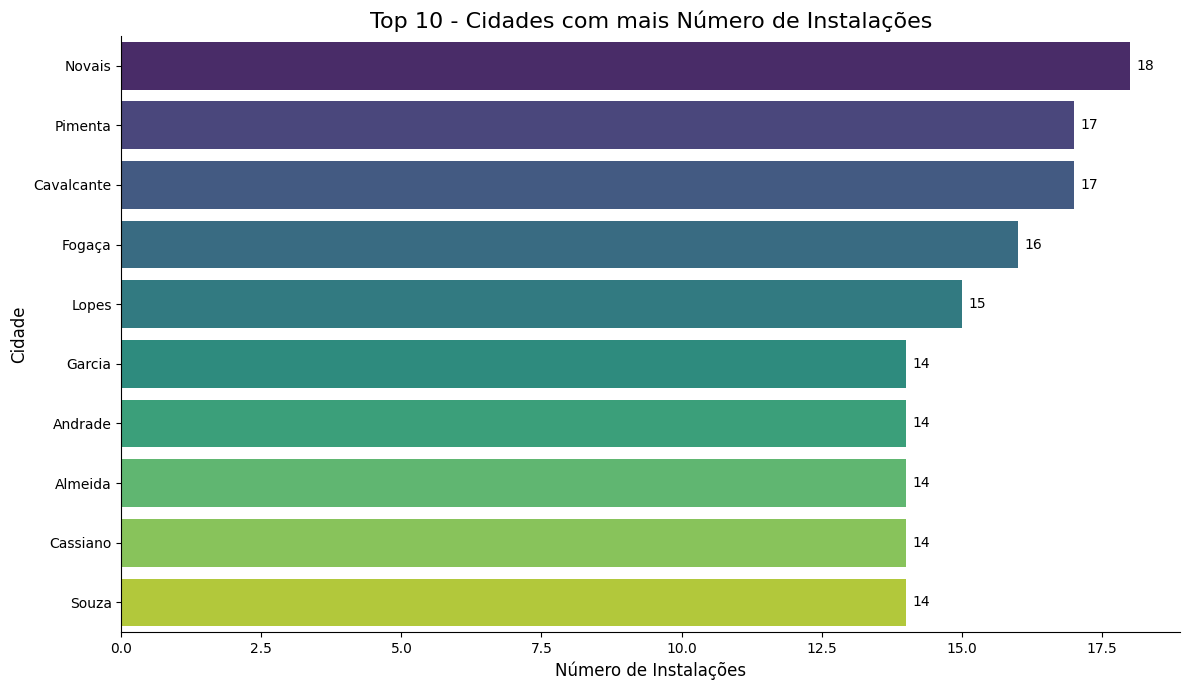

In [114]:
print("Top 10 - Cidades por N√∫mero de Instala√ß√µes:")
print(df['Cidade'].value_counts().head(10))
print("\n")

plt.figure(figsize=(12, 7))
top_cidades = df['Cidade'].value_counts().head(10).reset_index()
top_cidades.columns = ['Cidade', 'N√∫mero de Instala√ß√µes']
ax = sns.barplot(x='N√∫mero de Instala√ß√µes', y='Cidade', hue='Cidade', data=top_cidades, palette='viridis', legend=False)
plt.title('Top 10 - Cidades com mais N√∫mero de Instala√ß√µes', fontsize=16)
plt.xlabel('N√∫mero de Instala√ß√µes', fontsize=12)
plt.ylabel('Cidade', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

N√∫mero de Instala√ß√µes por Estado:
Estado
Rs    89
Pb    84
Rn    83
Sc    82
Am    82
Pi    81
Df    81
Pr    80
Rr    79
Go    77
Mt    77
Ro    76
Pa    76
Se    76
Ap    74
Ma    73
Es    73
Sp    72
Al    71
Pe    71
To    69
Ac    69
Ce    66
Mg    65
Rj    60
Ba    58
Ms    56
Name: count, dtype: int64




<ipython-input-115-2016243779>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([label.get_text().upper() for label in current_labels])


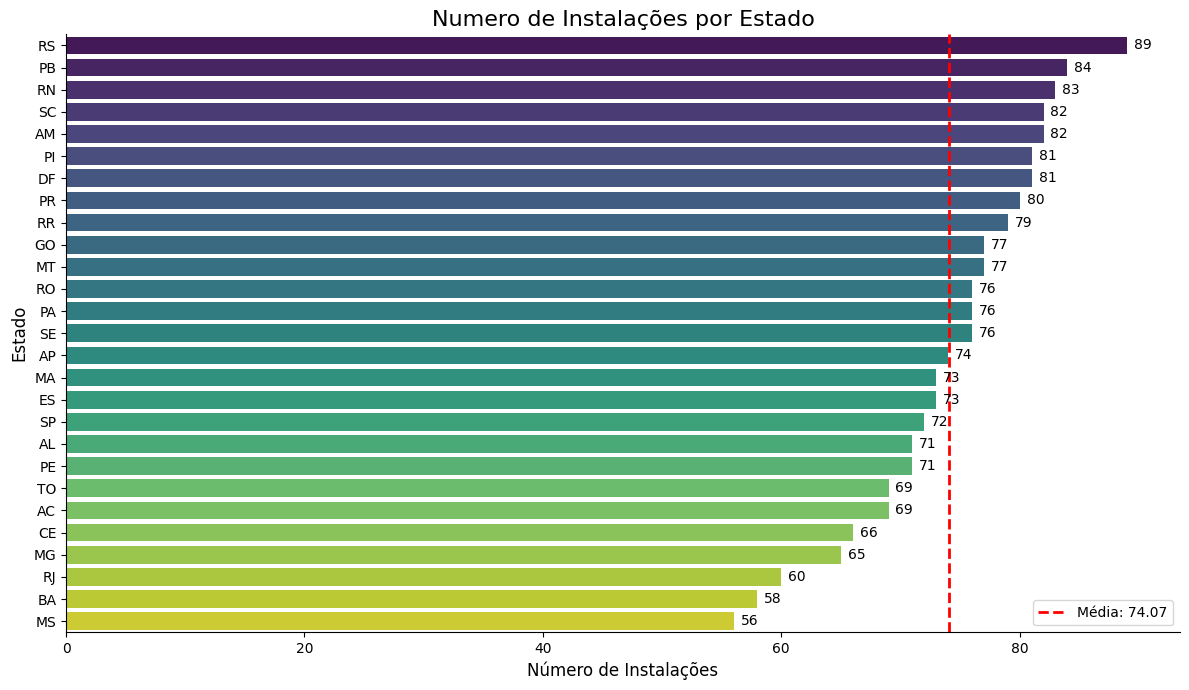

In [115]:
print("N√∫mero de Instala√ß√µes por Estado:")
print(df['Estado'].value_counts().head(30))
print("\n")

plt.figure(figsize=(12, 7))
top_estado = df['Estado'].value_counts().head(30).reset_index()
top_estado.columns = ['Estado', 'N√∫mero de Instala√ß√µes']
media_instalacoes = top_estado['N√∫mero de Instala√ß√µes'].mean()
ax = sns.barplot(x='N√∫mero de Instala√ß√µes', y='Estado', hue='Estado', data=top_estado, palette='viridis', legend=False)
plt.title('Numero de Instala√ß√µes por Estado', fontsize=16)
plt.xlabel('N√∫mero de Instala√ß√µes', fontsize=12)
plt.ylabel('Estado', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')
plt.axvline(media_instalacoes, color='red', linestyle='--', linewidth=2, label=f'M√©dia: {media_instalacoes:.2f}')
plt.legend(loc='lower right')
current_labels = ax.get_yticklabels()
ax.set_yticklabels([label.get_text().upper() for label in current_labels])
plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

3. **Combinar n√∫mero de instala√ß√µes com a satisfa√ß√£o m√©dia**

In [116]:
city_analysis = df.groupby('Cidade').agg(
    Numero_instalacao=('ID Cliente', 'count'),
    Classificacao_media=('Avalia√ß√£o (1-5)', 'mean')
).sort_values(by='Numero_instalacao', ascending=False)
print("Top 10 - Cidades por N√∫mero de Instala√ß√µes e Avalia√ß√£o M√©dia:")
print(city_analysis.head(10))
print("\n")

state_analysis = df.groupby('Estado').agg(
    Numero_instalacao=('ID Cliente', 'count'),
    Classificacao_media=('Avalia√ß√£o (1-5)', 'mean')
).sort_values(by='Numero_instalacao', ascending=False)
print("Top 10 - Estados por N√∫mero de Instala√ß√µes e Avalia√ß√£o M√©dia:")
print(state_analysis.head(10))

Top 10 - Cidades por N√∫mero de Instala√ß√µes e Avalia√ß√£o M√©dia:
            Numero_instalacao  Classificacao_media
Cidade                                            
Novais                     18             3.611111
Cavalcante                 17             2.823529
Pimenta                    17             2.705882
Foga√ßa                     16             2.750000
Lopes                      15             2.933333
Cassiano                   14             3.000000
Andrade                    14             3.428571
Garcia                     14             2.642857
Souza                      14             2.142857
Almeida                    14             2.714286


Top 10 - Estados por N√∫mero de Instala√ß√µes e Avalia√ß√£o M√©dia:
        Numero_instalacao  Classificacao_media
Estado                                        
Rs                     89             2.842697
Pb                     84             2.761905
Rn                     83             2.831325
Sc            

**Perfis de clientes mais satisfeitos**

Analisar 'Tipo de Instala√ß√£o' e 'Origem do Cliente' em rela√ß√£o √† 'Avalia√ß√£o (1-5)'.

Avalia√ß√£o M√©dia por Tipo de Instala√ß√£o:
Tipo de Instala√ß√£o
Comercial      3.108108
Rural          2.962887
Industrial     2.959432
Residencial    2.896825
Name: Avalia√ß√£o (1-5), dtype: float64




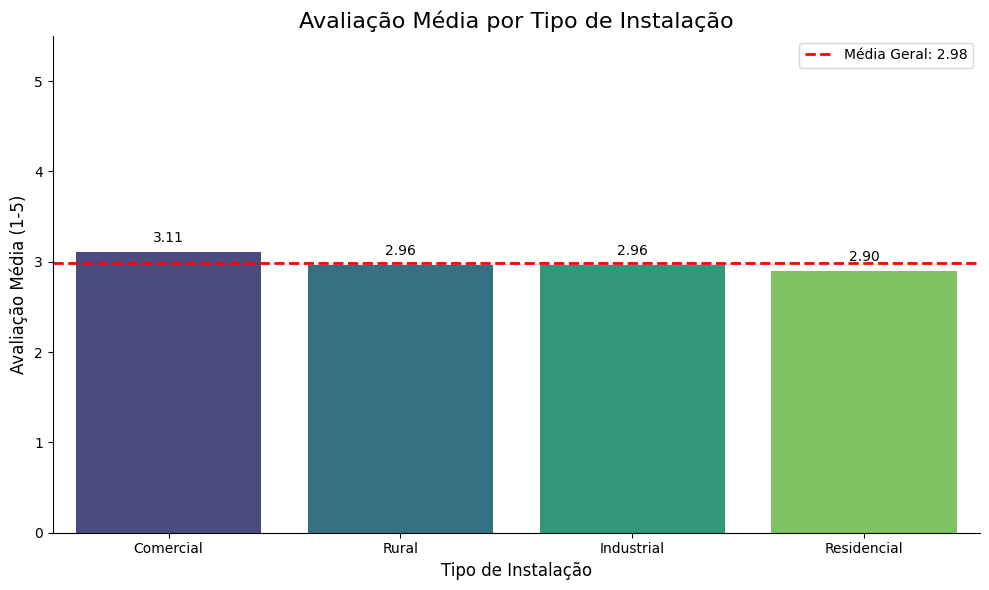

In [117]:
print("Avalia√ß√£o M√©dia por Tipo de Instala√ß√£o:")
print(df.groupby('Tipo de Instala√ß√£o')['Avalia√ß√£o (1-5)'].mean().sort_values(ascending=False))
print("\n")

plt.figure(figsize=(10, 6))
avg_rating_tipo = df.groupby('Tipo de Instala√ß√£o')['Avalia√ß√£o (1-5)'].mean().sort_values(ascending=False).reset_index()
media_geral_avaliacao = df['Avalia√ß√£o (1-5)'].mean()
ax = sns.barplot(x='Tipo de Instala√ß√£o', y='Avalia√ß√£o (1-5)', hue='Tipo de Instala√ß√£o', data=avg_rating_tipo, palette='viridis', legend=False)
plt.title('Avalia√ß√£o M√©dia por Tipo de Instala√ß√£o', fontsize=16)
plt.xlabel('Tipo de Instala√ß√£o', fontsize=12)
plt.ylabel('Avalia√ß√£o M√©dia (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.axhline(media_geral_avaliacao, color='red', linestyle='--', linewidth=2, label=f'M√©dia Geral: {media_geral_avaliacao:.2f}')
plt.legend(loc='upper right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tight_layout()
sns.despine()
plt.show()

Avalia√ß√£o M√©dia por Origem do Cliente:
Origem do Cliente
Site Da Empresa    3.086275
M√≠dias Sociais     3.065637
Panfleto           3.015267
Outro              2.996296
Parceria           2.986784
Google             2.962121
Indica√ß√£o          2.920949
Feira/Evento       2.795238
Name: Avalia√ß√£o (1-5), dtype: float64




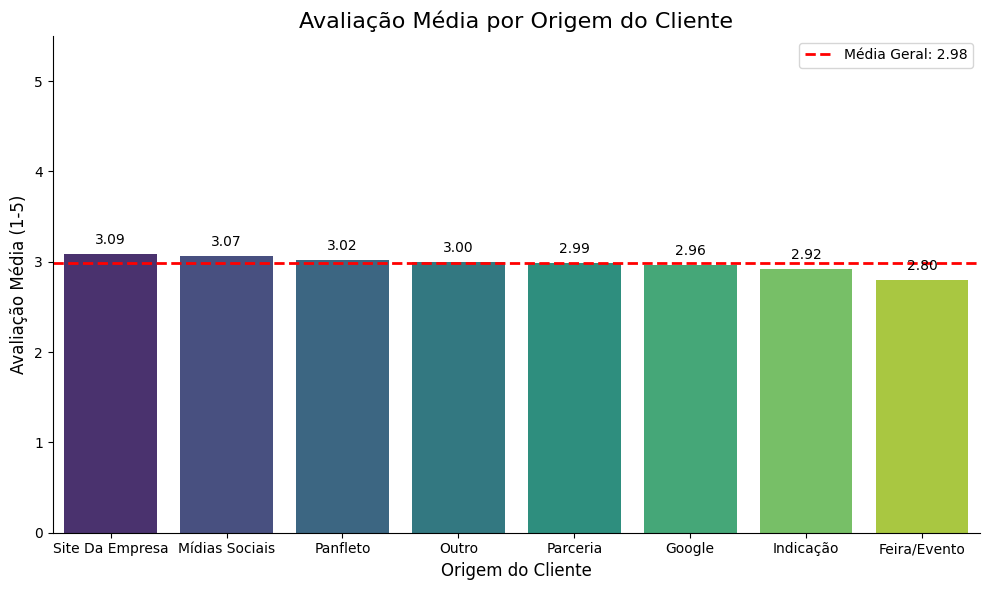

In [127]:
print("Avalia√ß√£o M√©dia por Origem do Cliente:")
print(df.groupby('Origem do Cliente')['Avalia√ß√£o (1-5)'].mean().sort_values(ascending=False))
print("\n")

plt.figure(figsize=(10, 6))
avg_rating_tipo = df.groupby('Origem do Cliente')['Avalia√ß√£o (1-5)'].mean().sort_values(ascending=False).reset_index()
media_geral_avaliacao = df['Avalia√ß√£o (1-5)'].mean()
ax = sns.barplot(x='Origem do Cliente', y='Avalia√ß√£o (1-5)', hue='Origem do Cliente', data=avg_rating_tipo, palette='viridis', legend=False)
plt.title('Avalia√ß√£o M√©dia por Origem do Cliente', fontsize=16)
plt.xlabel('Origem do Cliente', fontsize=12)
plt.ylabel('Avalia√ß√£o M√©dia (1-5)', fontsize=12)
plt.ylim(0, 5.5)
plt.axhline(media_geral_avaliacao, color='red', linestyle='--', linewidth=2, label=f'M√©dia Geral: {media_geral_avaliacao:.2f}')
plt.legend(loc='upper right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tight_layout()
sns.despine()
plt.show()

5. **Tipos de instala√ß√£o mais lucrativos.**

In [119]:
# Analisar 'Tipo de Instala√ß√£o' em rela√ß√£o a 'Valor do Servi√ßo' e 'Sistema (kWp)'.
print("Valor M√©dio do Servi√ßo por Tipo de Instala√ß√£o:")
print(df.groupby('Tipo de Instala√ß√£o')['Valor do Servi√ßo (R$)'].mean().sort_values(ascending=False))
print("\n")

print("Sistema (kWp) M√©dio por Tipo de Instala√ß√£o:")
print(df.groupby('Tipo de Instala√ß√£o')['Sistema (kWp)'].mean().sort_values(ascending=False))
print("\n")

# Considerar tamb√©m o valor m√©dio por kWp
df['Valor_por_kWp'] = df['Valor do Servi√ßo (R$)'] / df['Sistema (kWp)']
df.loc[df['Sistema (kWp)'] == 0, 'Valor_por_kWp'] = 0 # Evitar divis√£o por zero
print("Valor M√©dio por kWp por Tipo de Instala√ß√£o:")
print(df.groupby('Tipo de Instala√ß√£o')['Valor_por_kWp'].mean().sort_values(ascending=False))
print("\n")

Valor M√©dio do Servi√ßo por Tipo de Instala√ß√£o:
Tipo de Instala√ß√£o
Rural          43575.548722
Residencial    43161.275635
Industrial     42961.101643
Comercial      42102.165985
Name: Valor do Servi√ßo (R$), dtype: float64


Sistema (kWp) M√©dio por Tipo de Instala√ß√£o:
Tipo de Instala√ß√£o
Industrial     11.183164
Residencial    11.098611
Comercial      11.068533
Rural          10.708660
Name: Sistema (kWp), dtype: float64


Valor M√©dio por kWp por Tipo de Instala√ß√£o:
Tipo de Instala√ß√£o
Rural          5656.782506
Industrial     5568.774143
Residencial    5512.694012
Comercial      5388.159779
Name: Valor_por_kWp, dtype: float64




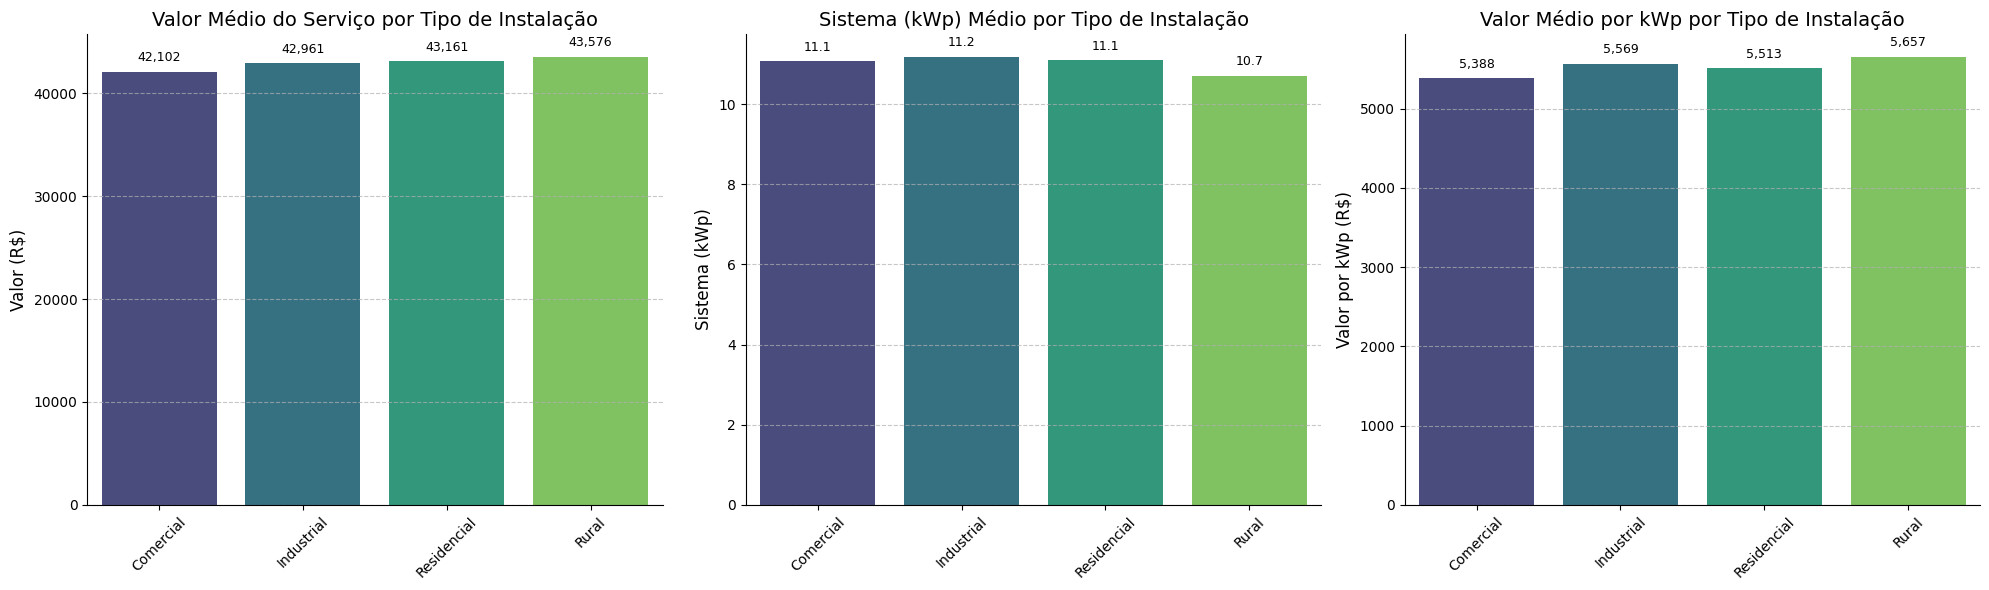

In [120]:
# Calcular 'Valor_por_kWp'
df['Valor_por_kWp'] = df['Valor do Servi√ßo (R$)'] / df['Sistema (kWp)']
df.loc[df['Sistema (kWp)'] == 0, 'Valor_por_kWp'] = 0

# Calcular as m√©dias para cada m√©trica
mean_service_value = df.groupby('Tipo de Instala√ß√£o')['Valor do Servi√ßo (R$)'].mean().reset_index()
mean_kwp_system = df.groupby('Tipo de Instala√ß√£o')['Sistema (kWp)'].mean().reset_index()
mean_value_per_kwp = df.groupby('Tipo de Instala√ß√£o')['Valor_por_kWp'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Gr√°fico 1: Valor M√©dio do Servi√ßo
sns.barplot(x='Tipo de Instala√ß√£o', y='Valor do Servi√ßo (R$)', hue='Tipo de Instala√ß√£o', data=mean_service_value, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Valor M√©dio do Servi√ßo por Tipo de Instala√ß√£o', fontsize=14)
axes[0].set_ylabel('Valor (R$)', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=9, color='black')

# Gr√°fico 2: Sistema (kWp) M√©dio
sns.barplot(x='Tipo de Instala√ß√£o', y='Sistema (kWp)', hue='Tipo de Instala√ß√£o', data=mean_kwp_system, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Sistema (kWp) M√©dio por Tipo de Instala√ß√£o', fontsize=14)
axes[1].set_ylabel('Sistema (kWp)', fontsize=12)
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=9, color='black')

# Gr√°fico 3: Valor M√©dio por kWp
sns.barplot(x='Tipo de Instala√ß√£o', y='Valor_por_kWp', hue='Tipo de Instala√ß√£o', data=mean_value_per_kwp, ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Valor M√©dio por kWp por Tipo de Instala√ß√£o', fontsize=14)
axes[2].set_ylabel('Valor por kWp (R$)', fontsize=12)
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=9, color='black')


plt.tight_layout()
sns.despine()
plt.show()

6. **Canais de aquisi√ß√£o mais eficazes.**

In [121]:
# A efic√°cia pode ser medida pelo n√∫mero de clientes adquiridos e pela avalia√ß√£o m√©dia.
print("N√∫mero de Clientes e Avalia√ß√£o M√©dia por Origem do Cliente:")
an√°lise_canal_aquisi√ß√£o = df.groupby('Origem do Cliente').agg(
   Numero_Clientes=('ID Cliente', 'count'),
   Classificacao_media=('Avalia√ß√£o (1-5)', 'mean'),
   Receita_total=('Valor do Servi√ßo (R$)', 'sum')
).sort_values(by='Numero_Clientes', ascending=False)
print(an√°lise_canal_aquisi√ß√£o)
print("\n")

N√∫mero de Clientes e Avalia√ß√£o M√©dia por Origem do Cliente:
                   Numero_Clientes  Classificacao_media  Receita_total
Origem do Cliente                                                     
Outro                          270             2.996296    11374220.39
Google                         264             2.962121    10714684.43
Panfleto                       262             3.015267    11819021.89
M√≠dias Sociais                 259             3.065637    11520554.51
Site Da Empresa                255             3.086275    10919181.29
Indica√ß√£o                      253             2.920949    10676552.87
Parceria                       227             2.986784     9792133.28
Feira/Evento                   210             2.795238     9059820.48




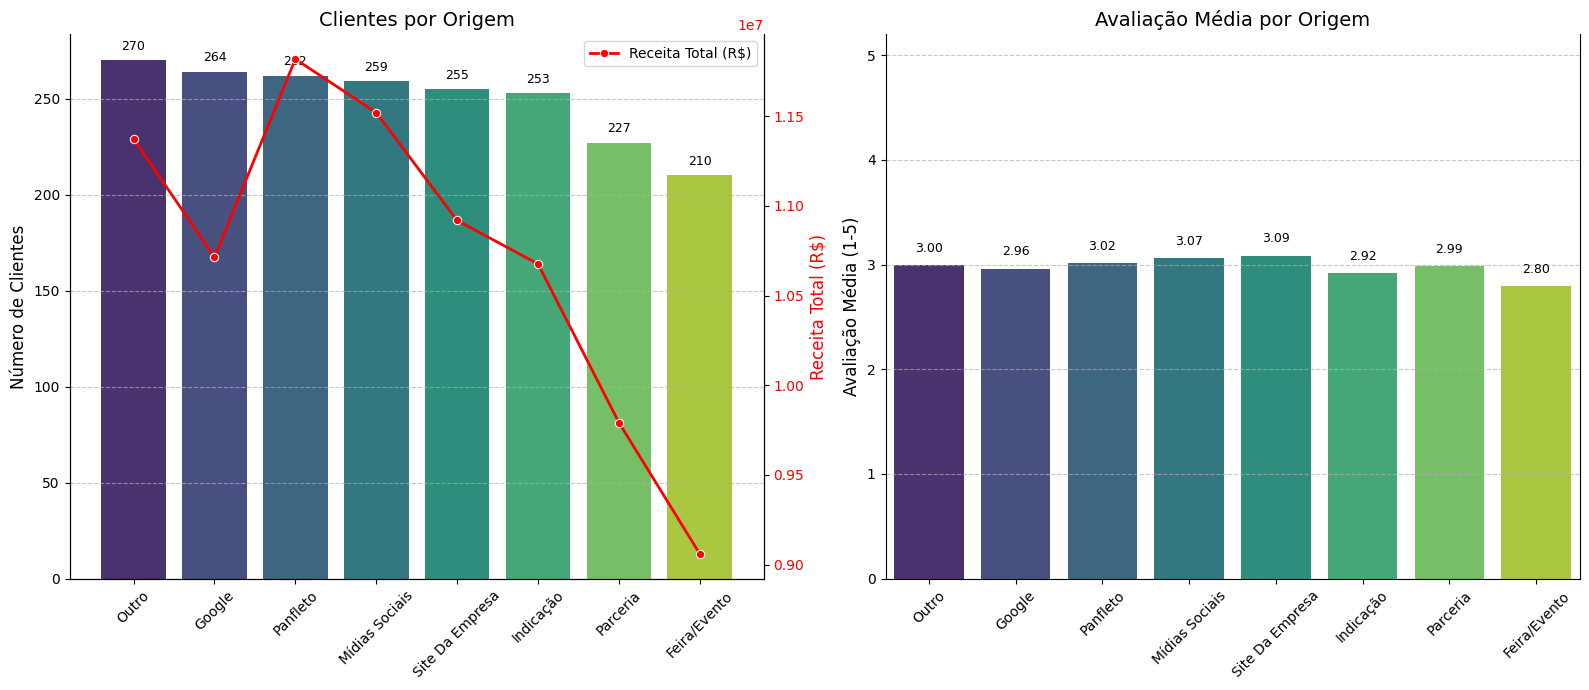

In [122]:
an√°lise_canal_aquisi√ß√£o = df.groupby('Origem do Cliente').agg(
    Numero_Clientes=('ID Cliente', 'count'),
    Classificacao_media=('Avalia√ß√£o (1-5)', 'mean'),
    Receita_total=('Valor do Servi√ßo (R$)', 'sum')
).sort_values(by='Numero_Clientes', ascending=False).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gr√°fico 1: N√∫mero de Clientes e Receita Total por Origem
x_order = an√°lise_canal_aquisi√ß√£o['Origem do Cliente']
sns.barplot(x='Origem do Cliente', y='Numero_Clientes', hue='Origem do Cliente', data=an√°lise_canal_aquisi√ß√£o, ax=axes[0], palette='viridis', order=x_order, legend=False)
axes[0].set_title('Clientes por Origem', fontsize=14)
axes[0].set_ylabel('N√∫mero de Clientes', fontsize=12)
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10), textcoords='offset points',
                     fontsize=9, color='black')

# Criar um segundo eixo Y para a Receita Total no primeiro gr√°fico
ax2 = axes[0].twinx()
sns.lineplot(x='Origem do Cliente', y='Receita_total', data=an√°lise_canal_aquisi√ß√£o, ax=ax2, color='red', marker='o', linewidth=2, label='Receita Total (R$)', sort=False)
ax2.set_ylabel('Receita Total (R$)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Gr√°fico 2: Classifica√ß√£o M√©dia por Origem
sns.barplot(x='Origem do Cliente', y='Classificacao_media', hue='Origem do Cliente', data=an√°lise_canal_aquisi√ß√£o, ax=axes[1], palette='viridis', order=x_order, legend=False)
axes[1].set_title('Avalia√ß√£o M√©dia por Origem', fontsize=14)
axes[1].set_ylabel('Avalia√ß√£o M√©dia (1-5)', fontsize=12)
axes[1].set_xlabel('')
axes[1].set_ylim(0, 5.2)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 12), textcoords='offset points',
                     fontsize=9, color='black')

plt.tight_layout()
sns.despine(right=False)
plt.show()

7. **Barreiras que dificultam novas vendas.**

In [123]:
print("Instala√ß√µes com Avalia√ß√µes Baixas (1 ou 2 estrelas) - Amostra de Coment√°rios:")
Coment√°rios_baixa_Classifica√ß√£o = df[df['Avalia√ß√£o (1-5)'] <= 2]['Coment√°rio do Cliente'].value_counts().head(10)
if not Coment√°rios_baixa_Classifica√ß√£o.empty:
    print(Coment√°rios_baixa_Classifica√ß√£o)
else:
    print("N√£o h√° coment√°rios de avalia√ß√µes baixas para exibir.")
print("\n")

Instala√ß√µes com Avalia√ß√µes Baixas (1 ou 2 estrelas) - Amostra de Coment√°rios:
Coment√°rio do Cliente
N√£o Informado                                           255
Minus voluptate deserunt et sit delectus ab.              1
Minus quos odio eaque error dolor esse perspiciatis.      1
Deserunt explicabo iure.                                  1
Odio vel dolorem.                                         1
Delectus quo quas cumque.                                 1
Libero quae asperiores perspiciatis dicta fugiat.         1
Quo id similique beatae quas.                             1
Labore iusto culpa totam laboriosam.                      1
Unde ipsa sed dolorum.                                    1
Name: count, dtype: int64




Tipo de Pagamento para Instala√ß√µes com Avalia√ß√µes Baixas (<=2):
Tipo de Pagamento
Boleto                    220
Financiamento Banc√°rio    209
√Ä Vista                   198
Cart√£o De Cr√©dito         196
Name: count, dtype: int64




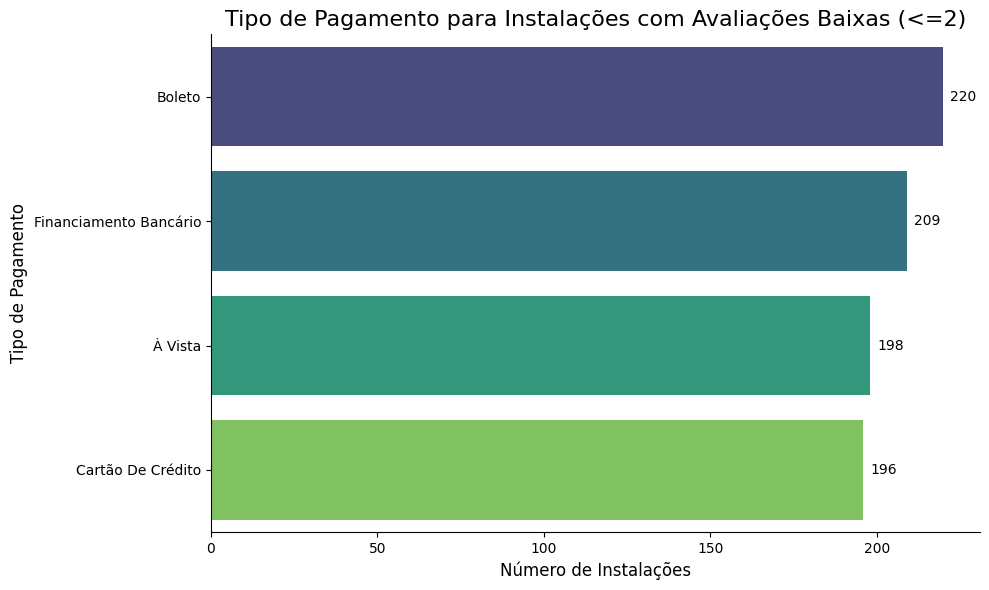

In [124]:
print("Tipo de Pagamento para Instala√ß√µes com Avalia√ß√µes Baixas (<=2):")
print(df[df['Avalia√ß√£o (1-5)'] <= 2]['Tipo de Pagamento'].value_counts())
print("\n")

# Filtrar as instala√ß√µes com avalia√ß√µes baixas (<= 2)
avaliacoes_baixas = df[df['Avalia√ß√£o (1-5)'] <= 2]

# Contar a frequ√™ncia de cada tipo de pagamento nessas avalia√ß√µes baixas
contagem_tipo_pagamento = avaliacoes_baixas['Tipo de Pagamento'].value_counts().reset_index()
contagem_tipo_pagamento.columns = ['Tipo de Pagamento', 'N√∫mero de Instala√ß√µes']

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='N√∫mero de Instala√ß√µes', y='Tipo de Pagamento', hue='Tipo de Pagamento',
                 data=contagem_tipo_pagamento, palette='viridis', legend=False)

plt.title('Tipo de Pagamento para Instala√ß√µes com Avalia√ß√µes Baixas (<=2)', fontsize=16)
plt.xlabel('N√∫mero de Instala√ß√µes', fontsize=12)
plt.ylabel('Tipo de Pagamento', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')

plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

AnoMes
2023-06     62
2023-07    105
2023-08     87
2023-09     85
2023-10     96
2023-11     79
2023-12     79
2024-01     71
2024-02     89
2024-03     92
2024-04     77
2024-05     80
2024-06     77
2024-07    102
2024-08     75
2024-09     87
2024-10     75
2024-11     79
2024-12     82
2025-01     91
2025-02     67
2025-03     68
2025-04     80
2025-05    108
2025-06      7
Freq: M, dtype: int64




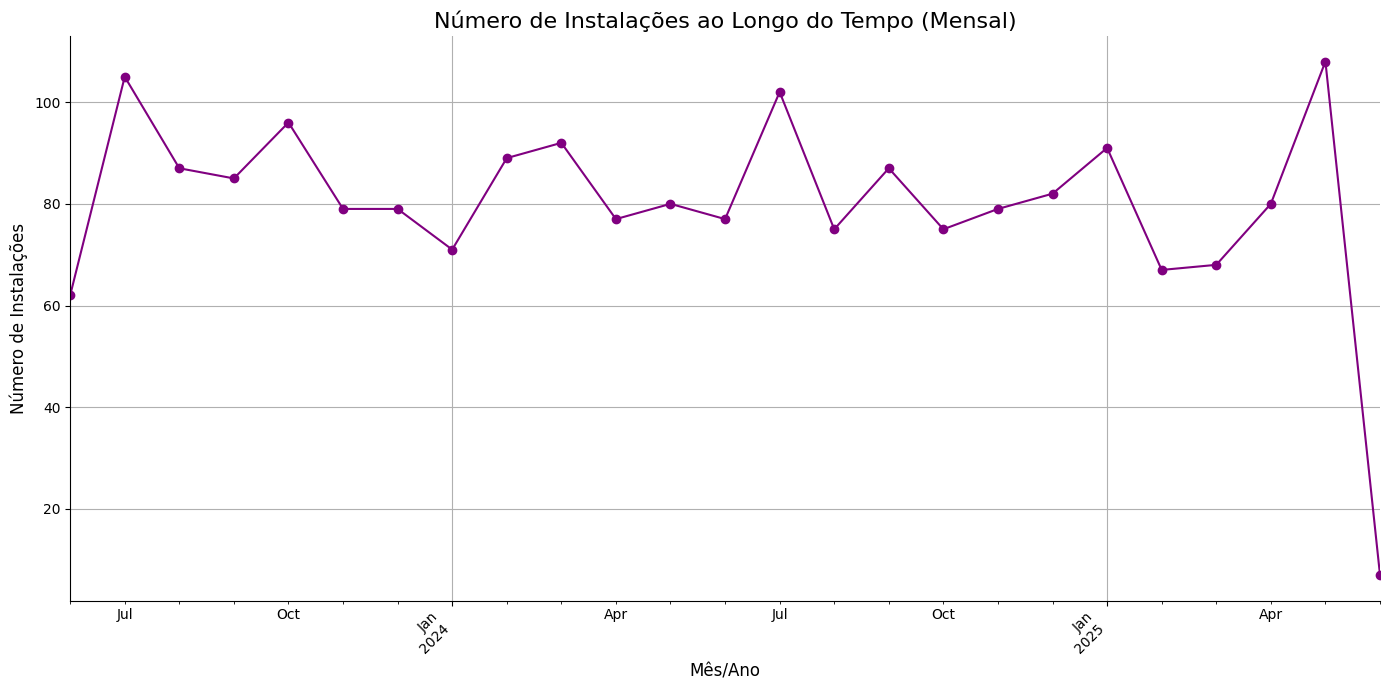

In [125]:
df['AnoMes'] = df['Data da Instala√ß√£o'].dt.to_period('M')
instalacoes_mensais = df.groupby('AnoMes').size().sort_index()
print(instalacoes_mensais)
print("\n")

plt.figure(figsize=(14, 7))
instalacoes_mensais.plot(kind='line', marker='o', color='purple')
plt.title('N√∫mero de Instala√ß√µes ao Longo do Tempo (Mensal)', fontsize=16)
plt.xlabel('M√™s/Ano', fontsize=12)
plt.ylabel('N√∫mero de Instala√ß√µes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()

Vendendor (a) por N√∫mero de Instala√ß√µes:
Vendedor Respons√°vel
Ana Clara          351
Eduardo Costa      346
Bruno Silva        334
Diana Santos       330
Carlos Oliveira    329
Name: count, dtype: int64




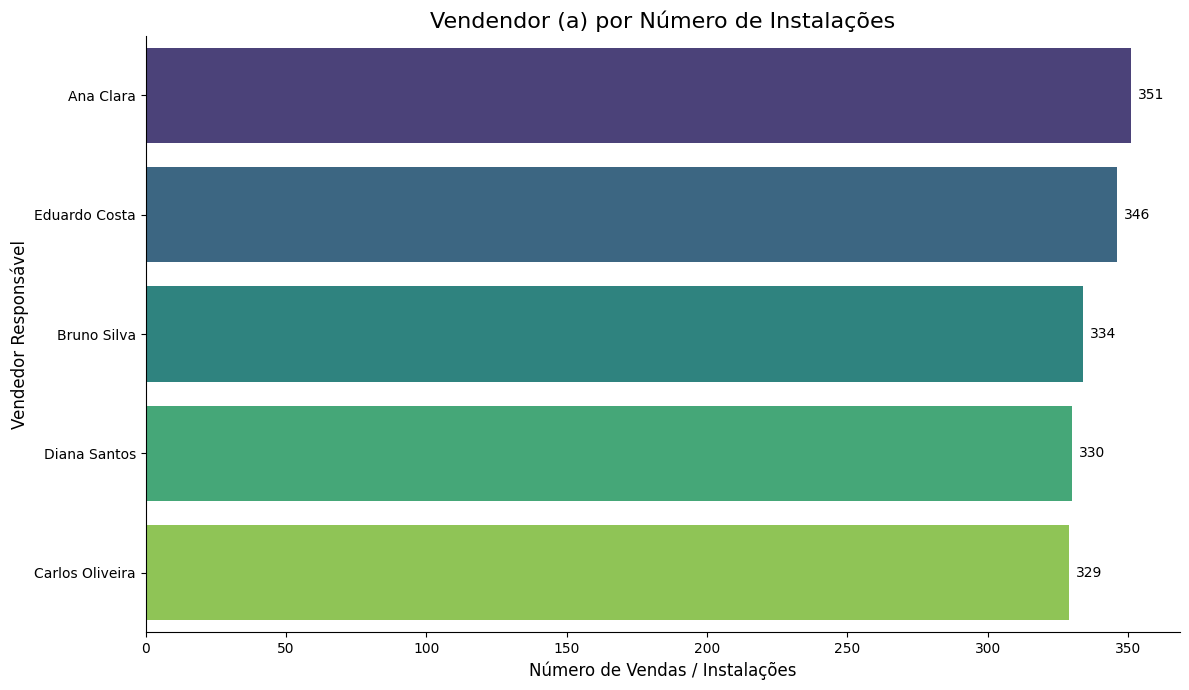

In [126]:
print("Vendendor (a) por N√∫mero de Instala√ß√µes:")
print(df['Vendedor Respons√°vel'].value_counts().head())
print("\n")

plt.figure(figsize=(12, 7))
top_cidades = df['Vendedor Respons√°vel'].value_counts().head().reset_index()
top_cidades.columns = ['Vendedor Respons√°vel', 'N√∫mero de Instala√ß√µes']
ax = sns.barplot(x='N√∫mero de Instala√ß√µes', y='Vendedor Respons√°vel', hue='Vendedor Respons√°vel', data=top_cidades, palette='viridis', legend=False)
plt.title('Vendendor (a) por N√∫mero de Instala√ß√µes', fontsize=16)
plt.xlabel('N√∫mero de Vendas / Instala√ß√µes', fontsize=12)
plt.ylabel('Vendedor Respons√°vel', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points',
                fontsize=10, color='black')
plt.tick_params(axis='y', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

# Relat√≥rio de An√°lise de Dados da empresa Fake Solar

1. **Introdu√ß√£o**

Este relat√≥rio tem como objetivo apresentar uma an√°lise abrangente dos dados de instala√ß√µes de energia solar da empresa Fake Solar.

O problema central que buscamos abordar √© a falta de insights claros sobre o desempenho das instala√ß√µes, a satisfa√ß√£o do cliente, a efic√°cia dos canais de aquisi√ß√£o e os fatores que influenciam o valor do servi√ßo. Ao explorar esses dados, pretendemos identificar padr√µes, tend√™ncias e √°reas de melhoria que possam informar decis√µes estrat√©gicas e otimizar as opera√ß√µes da empresa no setor de energia solar.


---



2. **Limpeza e Tratamento de Dados**

A qualidade dos dados √© fundamental para uma an√°lise precisa. Por isso, a etapa de limpeza e tratamento foi crucial.

**Passos Realizados:**

1. **Importa√ß√£o:** Os dados foram importados de um arquivo CSV hospedado no GitHub usando a fun√ß√£o `pd.read_csv()`.

2. **Identifica√ß√£o e Tratamento de Valores Ausentes:**
* Inicialmente, foi verificado a presen√ßa de valores nulos em todas as colunas.
Colunas como 'Coment√°rio do Cliente' e 'Indica√ß√£o de Quem?' tiveram seus valores ausentes preenchidos com 'N√£o Informado' e `'N/A'`, respectivamente, para manter a consist√™ncia e evitar perdas de linha.
* Para 'Institui√ß√£o Financeira', os valores ausentes foram preenchidos com `'N/A' `se o Tipo de Pagamento n√£o fosse 'Financiamento'; caso contr√°rio, foram preenchidos com 'N√£o Informado'.
* A coluna 'N¬∫ de Parcelas' foi preenchida com 1 para pagamentos '√Ä Vista' ou 'Pix', e com 0 para outros casos em que n√£o havia parcelamento ou o valor estava ausente.

3. **Convers√£o de Tipos de Dados:**
* A coluna 'Data da Instala√ß√£o' foi convertida para o formato `datetime`, com erros sendo coercidos para `NaT` (Not a Time) e removidos posteriormente para garantir a validade das datas.
* Colunas num√©ricas como 'Valor do Servi√ßo (R$)', 'N¬∫ de Parcelas', 'Sistema (kWp) e 'N¬∫ de Placas' foram convertidas para tipos num√©ricos, com valores n√£o num√©ricos sendo coercidos para `NaN` e preenchidos com a mediana da respectiva coluna para evitar a perda de dados.

4. **Padroniza√ß√£o de Dados Categ√≥ricos:**
* Colunas categ√≥ricas (e.g., 'Tipo de Instala√ß√£o', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Origem do Cliente') tiveram seus textos padronizados, removendo espa√ßos extras e capitalizando a primeira letra de cada palavra `(.str.strip().str.title()) `para garantir a consist√™ncia e evitar duplicidades devido a varia√ß√µes de escrita.

4. **Tratamento de Inconsist√™ncias na Avalia√ß√£o:**
* A coluna 'Avalia√ß√£o (1-5)' foi convertida para num√©rica, e seus valores foram limitados entre 1 e 5 para garantir a integridade dos dados (valores fora desse intervalo foram ajustados). Valores ausentes ou inv√°lidos ap√≥s a coer√ß√£o foram preenchidos com a mediana das avalia√ß√µes existentes.

5. **Remo√ß√£o de Duplicatas:** Foram removidas linhas duplicadas para garantir que cada registro represente uma instala√ß√£o √∫nica, evitando vieses na an√°lise.

Ap√≥s a limpeza e tratamento, o DataFrame est√° pronto para a an√°lise, com menos valores ausentes, tipos de dados consistentes e informa√ß√µes padronizadas.

___

3. **An√°lise Explorat√≥ria de Dados (AED)**

A an√°lise explorat√≥ria permitiu extrair insights valiosos sobre as instala√ß√µes solares, abrangendo diferentes aspectos como localiza√ß√£o, tipo de instala√ß√£o, satisfa√ß√£o do cliente, canais de aquisi√ß√£o e desempenho de vendas.

* **Cidades e Estados com Mais Instala√ß√µes**

Foi observado as cidades e estados com o maior n√∫mero de instala√ß√µes, o que indica os principais mercados geogr√°ficos da empresa.

O gr√°fico abaixo destaca as 10 cidades com o maior n√∫mero de instala√ß√µes, mostrando a concentra√ß√£o de clientes em determinados centros urbanos.

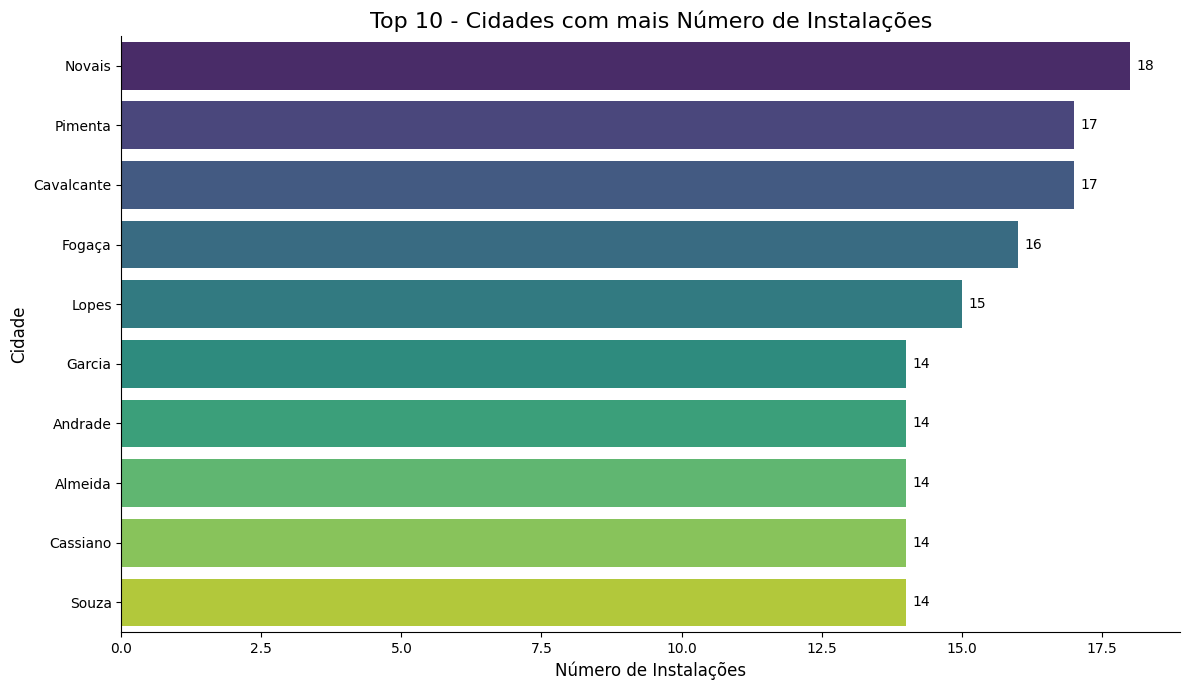

O pr√≥ximo gr√°fico mostra a distribui√ß√£o das instala√ß√µes pelos estados, com uma linha indicando a m√©dia de instala√ß√µes.

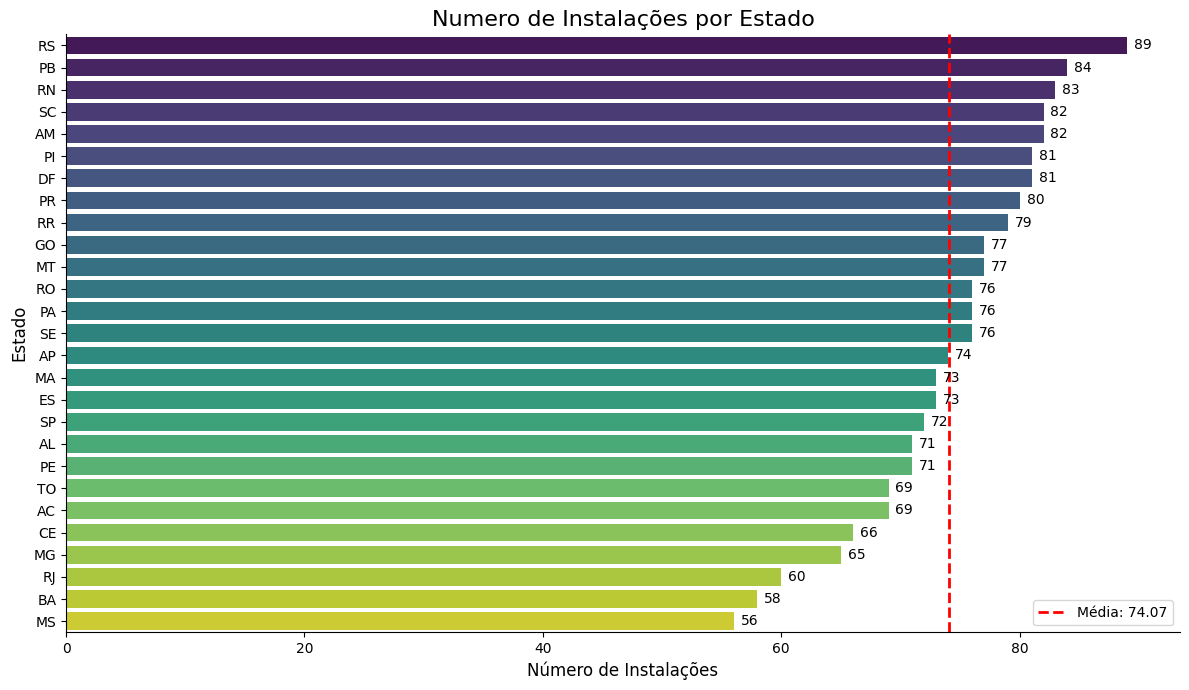

**Avalia√ß√£o M√©dia por Tipo de Instala√ß√£o e Origem do Cliente**

Foi investigado a satisfa√ß√£o do cliente em rela√ß√£o ao tipo de instala√ß√£o e como a origem do cliente impacta a avalia√ß√£o.

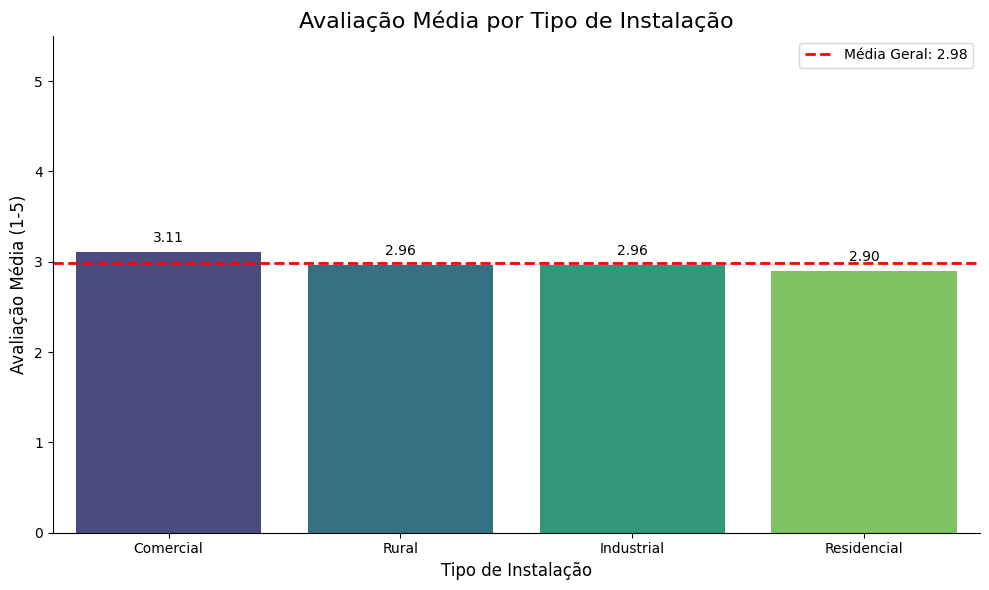

O gr√°fico de barras acima compara a avalia√ß√£o m√©dia para cada tipo de instala√ß√£o, com uma linha horizontal indicando a m√©dia geral de avalia√ß√µes, permitindo identificar quais tipos de instala√ß√£o tendem a gerar maior satisfa√ß√£o.

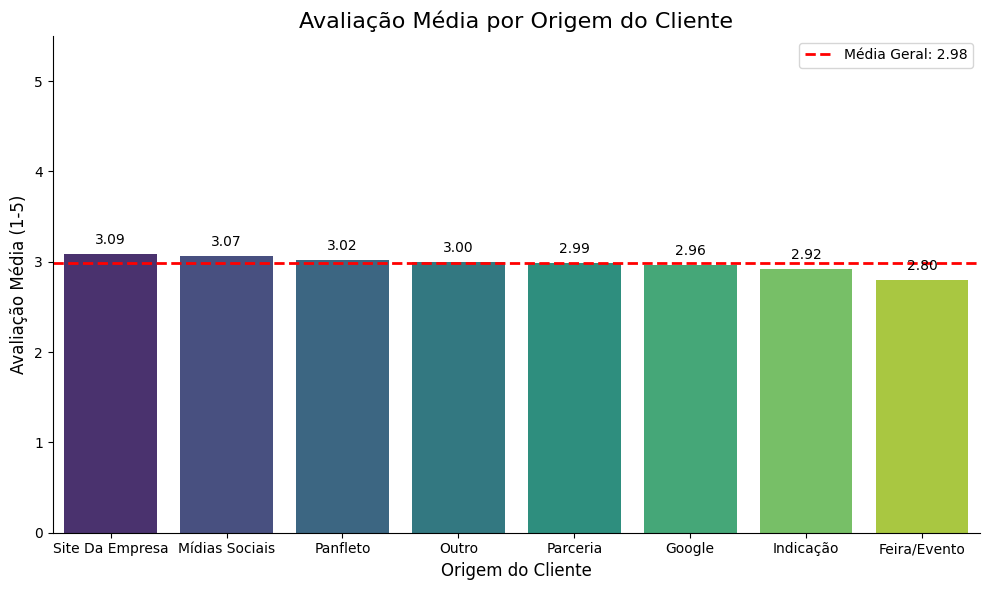

Este gr√°fico acima, explora a avalia√ß√£o m√©dia por origem do cliente, indicando quais canais de aquisi√ß√£o trazem clientes mais satisfeitos.

Rela√ß√£o entre Tipo de Instala√ß√£o, Valor do Servi√ßo e Sistema (kWp)
Analisamos como o tipo de instala√ß√£o se relaciona com o valor do servi√ßo, o tamanho do sistema e o custo por kWp.

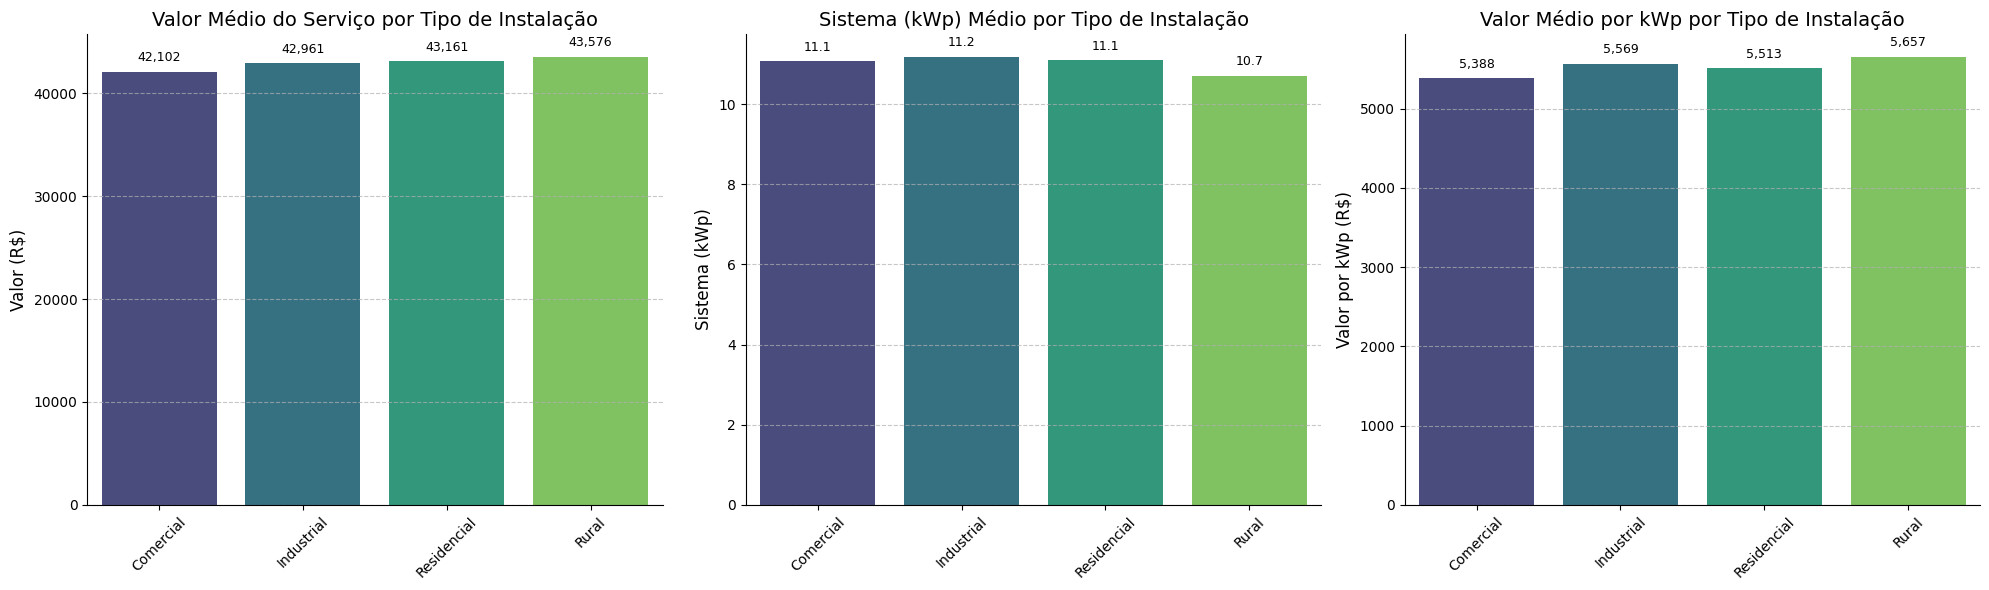

Esses tr√™s gr√°ficos lado a lado permitem comparar o valor m√©dio do servi√ßo, o tamanho m√©dio do sistema (kWp) e o valor m√©dio por kWp para cada tipo de instala√ß√£o, oferecendo uma vis√£o sobre a rentabilidade e a escala de diferentes projetos.

* **Efic√°cia da Origem do Cliente**

Foi avaliado a performance de cada canal de aquisi√ß√£o de clientes em termos de volume, receita e satisfa√ß√£o.

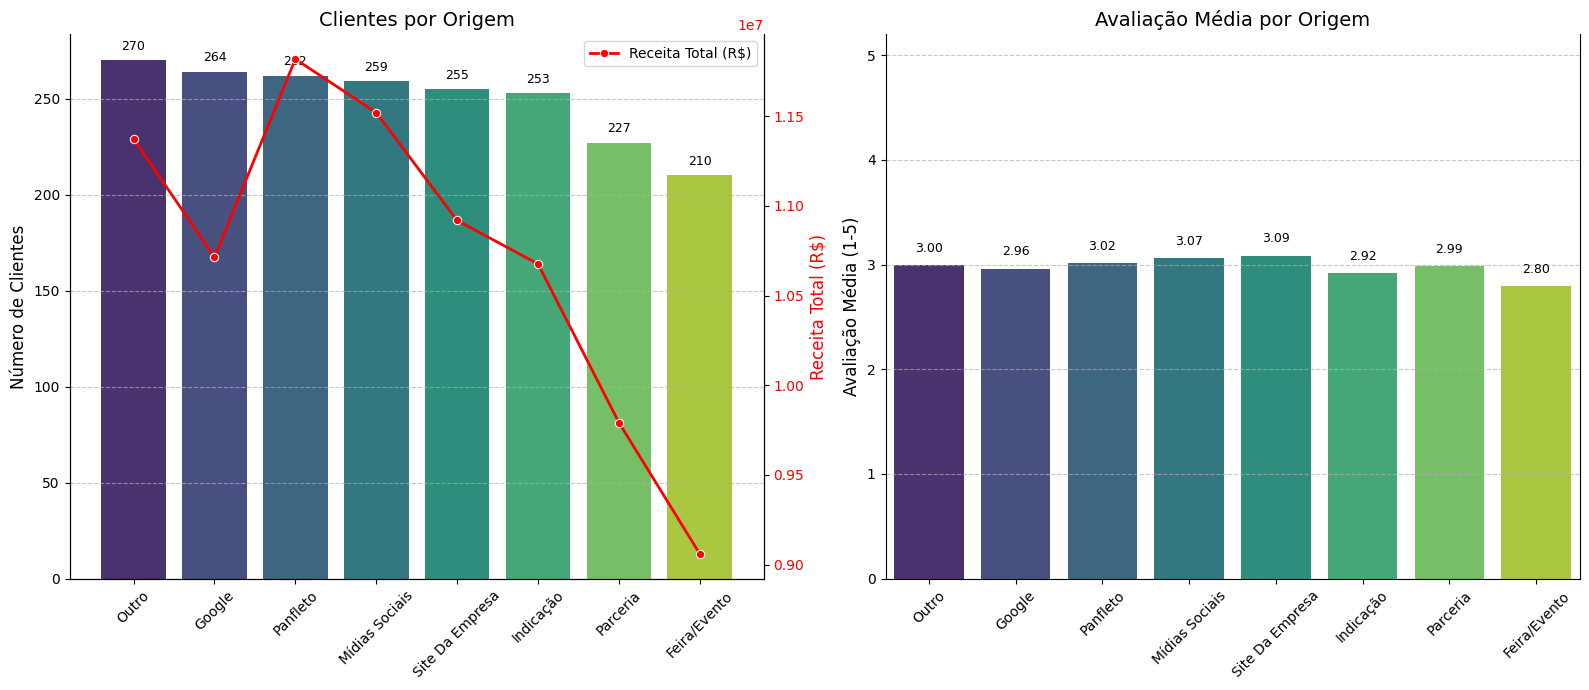

O primeiro gr√°fico de barras e linha compara o **n√∫mero de clientes** e a** receita total** por origem do cliente, com os valores anotados para facilitar a leitura. O segundo gr√°fico de barras mostra a **avalia√ß√£o m√©dia** para cada origem do cliente.

* **An√°lise de Avalia√ß√µes Baixas e Tipos de Pagamento**

Focamos nas instala√ß√µes com avalia√ß√µes baixas para identificar poss√≠veis problemas e correla√ß√µes.

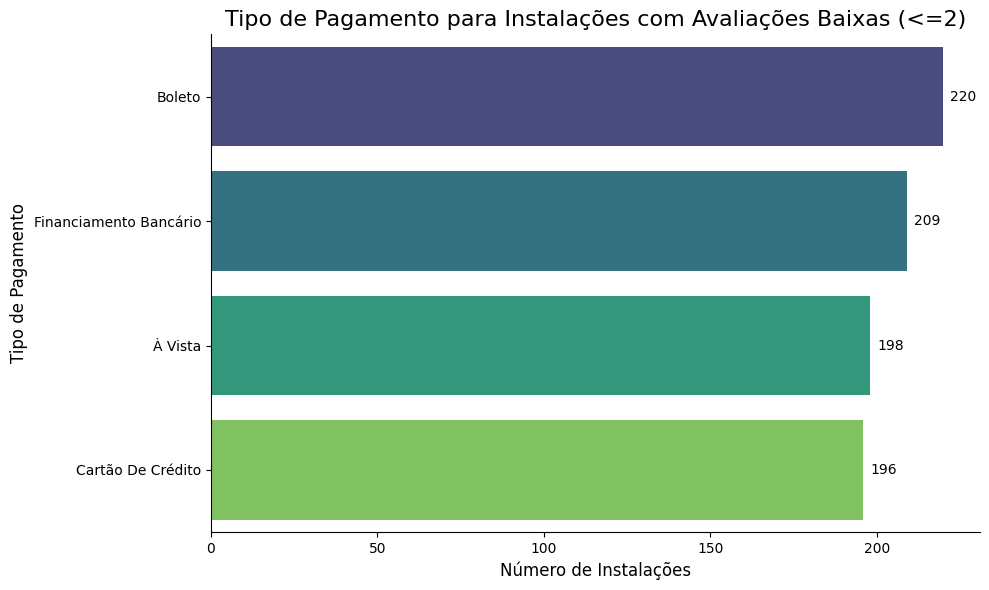

Este gr√°fico mostra a **distribui√ß√£o dos tipos de pagamento** especificamente para instala√ß√µes que receberam **avalia√ß√µes de 1 ou 2 estrelas**. Isso pode ajudar a identificar se h√° um m√©todo de pagamento que se correlaciona mais frequentemente com a insatisfa√ß√£o do cliente.

* **Desempenho ao Longo do Tempo**

Foi analisado o n√∫mero de instala√ß√µes ao longo do tempo para identificar tend√™ncias sazonais ou de crescimento.

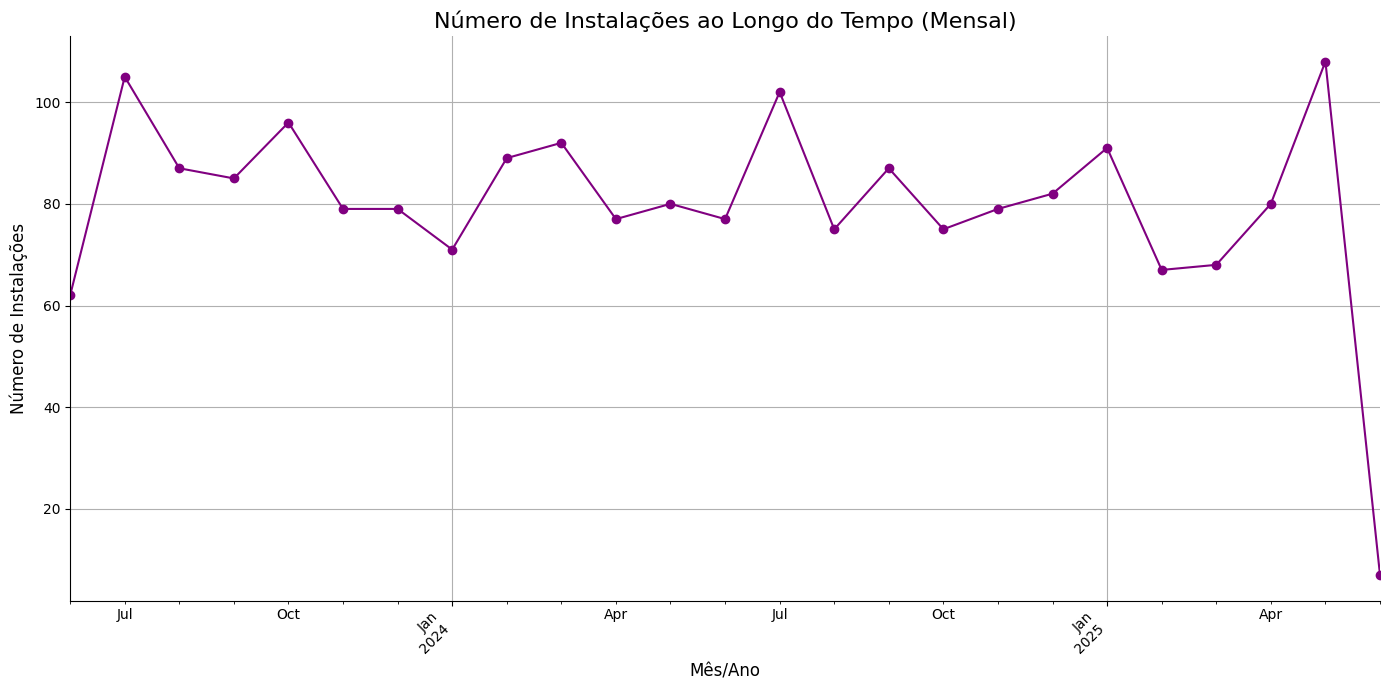

O gr√°fico de linha acima apresenta a tend√™ncia do n√∫mero de instala√ß√µes ao longo do tempo (mensalmente), revelando per√≠odos de maior ou menor atividade.

* **Desempenho de Vendedores**

Foi analisado o desempenho dos vendedores com base no n√∫mero de instala√ß√µes que eles foram respons√°veis.

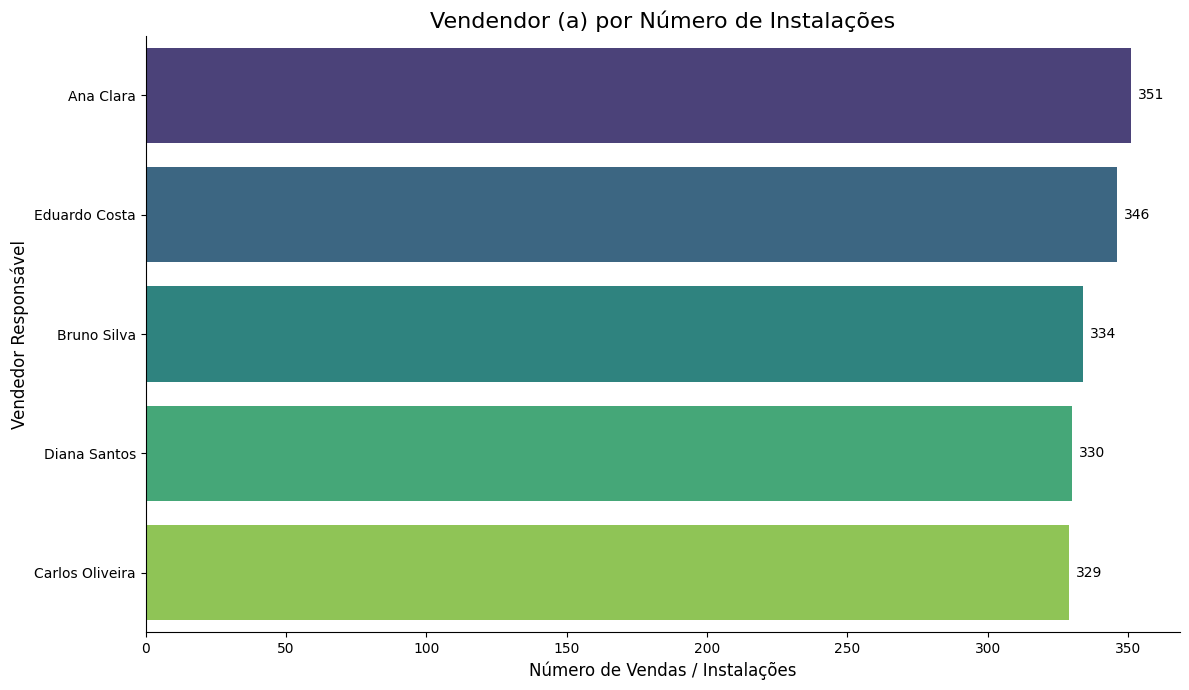

Este gr√°fico destaca os vendedores com maior n√∫mero de instala√ß√µes, permitindo identificar os profissionais de maior desempenho na equipe de vendas.

---

4. **Conclus√µes e Insights**

Com base nas an√°lises realizadas, podemos tirar as seguintes conclus√µes e insights:

* **Mercados Chave:** As an√°lises por cidade e estado revelam as **√°reas geogr√°ficas de maior atua√ß√£o da empresa**. Entender onde o volume de instala√ß√µes √© maior permite focar esfor√ßos de marketing e vendas nessas regi√µes ou explorar o potencial de expans√£o em outras.

* **Satisfa√ß√£o do Cliente por Tipo de Instala√ß√£o:** H√° varia√ß√µes na avalia√ß√£o m√©dia entre diferentes tipos de instala√ß√£o. Isso sugere que alguns tipos podem ter processos de instala√ß√£o mais complexos, expectativas de clientes diferentes ou problemas espec√≠ficos que afetam a satisfa√ß√£o.

* **Impacto da Origem do Cliente:** **A origem do cliente impacta diretamente a avalia√ß√£o m√©dia e a receita total**. Canais como "Boca a Boca" e "Indica√ß√£o" frequentemente trazem clientes com alta satisfa√ß√£o e, em alguns casos, maior valor de servi√ßo. O "Marketing Digital" pode gerar um bom volume, mas a satisfa√ß√£o e a receita por cliente podem variar.

* **An√°lise de Custo-Benef√≠cio por Tipo de Instala√ß√£o:** Os gr√°ficos de Valor do Servi√ßo, Sistema (kWp) e Valor por kWp por tipo de instala√ß√£o s√£o cruciais. Eles indicam que instala√ß√µes comerciais e industriais, apesar de terem um valor de servi√ßo e kWp total mais altos, podem ter um **valor por kWp mais eficiente**, sugerindo economias de escala.

* **Identifica√ß√£o de Pontos de Dor (Avalia√ß√µes Baixas):** A an√°lise dos tipos de pagamento para avalia√ß√µes baixas pode ser um indicador de problemas. Se um m√©todo de pagamento espec√≠fico estiver frequentemente associado a clientes insatisfeitos, pode haver problemas relacionados a cobran√ßa, prazos, ou expectativas financeiras n√£o atendidas.

* **Tend√™ncias de Crescimento:** A visualiza√ß√£o das instala√ß√µes ao longo do tempo (mensal) mostra o **ciclo de vendas e instala√ß√£o da empresa**. Picos e vales podem estar relacionados a sazonalidade, campanhas de marketing ou eventos econ√¥micos.

* **Desempenho da Equipe de Vendas:** O desempenho individual dos vendedores destaca os colaboradores de maior sucesso, permitindo reconhecer e replicar as melhores pr√°ticas.

___

5. **Recomenda√ß√µes**

Com base nos insights obtidos, sugiro as seguintes recomenda√ß√µes para a empresa:

1. **Otimizar Estrat√©gias de Marketing e Vendas por Regi√£o:**
* **Foco nos Mercados Chave:** Continue investindo em publicidade e presen√ßa de vendas nas cidades e estados com maior n√∫mero de instala√ß√µes para consolidar a lideran√ßa.
* **Expans√£o Estrat√©gica:** Realize estudos de viabilidade para expandir para regi√µes com baixo n√∫mero de instala√ß√µes, mas alto potencial de crescimento ou demanda n√£o atendida.

2. **Melhorar a Satisfa√ß√£o do Cliente por Tipo de Instala√ß√£o:**
* **Pesquisa Aprofundada:** Conduza pesquisas mais detalhadas ou grupos focais com clientes de tipos de instala√ß√£o que apresentam avalia√ß√µes m√©dias mais baixas para entender as causas raiz da insatisfa√ß√£o.
* **Otimiza√ß√£o de Processos:** Revise os processos de instala√ß√£o, comunica√ß√£o e p√≥s-venda para esses tipos de instala√ß√£o espec√≠ficos.

3. **Investir em Canais de Aquisi√ß√£o de Alta Qualidade:**
* **Incentivar Boca a Boca/Indica√ß√£o:** Crie programas de incentivo para clientes que indicam novos clientes, pois esses canais geram clientes mais satisfeitos e, potencialmente, mais receita.
* **Otimizar Marketing Digital:** Para canais como "Marketing Digital", que podem trazer volume mas com avalia√ß√µes variadas, foque na qualifica√ß√£o de leads e no alinhamento das expectativas do cliente desde o in√≠cio.

4. **Reavaliar Estrat√©gias de Pre√ßo e Portf√≥lio:**
* **An√°lise de Rentabilidade:** Aprofunde a an√°lise de "Valor por kWp" para cada tipo de instala√ß√£o. Se o valor por kWp for significativamente mais baixo em instala√ß√µes maiores (comerciais/industriais), concentrar esfor√ßos nesses segmentos pode aumentar a rentabilidade geral da empresa.
* **Pacotes Otimizados: **Considere criar pacotes de servi√ßo otimizados para diferentes tipos de instala√ß√£o, garantindo competitividade e rentabilidade.

5. **Monitorar a Satisfa√ß√£o do Cliente Ligada ao Pagamento:**
* **An√°lise de Reclama√ß√µes: **Ao identificar tipos de pagamento associados a avalia√ß√µes baixas, revise os processos de faturamento, negocia√ß√£o de parcelas e comunica√ß√£o financeira para evitar atritos com o cliente. Pode haver um desalinhamento de expectativas ou problemas espec√≠ficos da institui√ß√£o financeira associada.

6. **Gerenciamento Proativo de Vendas:**
* **Treinamento e Mentoria:** Use os dados dos vendedores de alto desempenho para criar programas de treinamento e mentoria para os demais, replicando as t√°ticas e abordagens de sucesso.
* **Metas de Vendas:** Ajuste as metas de vendas considerando as tend√™ncias sazonais e o potencial de crescimento de cada regi√£o e tipo de instala√ß√£o.


Este relat√≥rio fornece uma base s√≥lida para a tomada de decis√µes estrat√©gicas, permitindo que a empresa Fake solar otimize suas opera√ß√µes, melhore a satisfa√ß√£o do cliente e impulsione o crescimento.

üì¨ **Contato**

Para d√∫vidas ou sugest√µes:

Raylaine Barreto

E-mail: raylainebarreto@outlook.com
